### Questions
* onehot encoding and dummifying
* why having the right amount of bins in a histogram is a good thing
* can we log transform a target?
* to move from categorical...how is categorical information used
* log transformations


### Objectives
YWBAT
* apply data cleaning techniques to condition data for modeling
* analyze a MLR to drive changes and improve modeling

### Outline

In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.stats as sts
import scipy.stats as stats


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


import matplotlib.pyplot as plt
import seaborn as sns

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
### openml.org

df = pd.read_csv("dataset.csv")
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


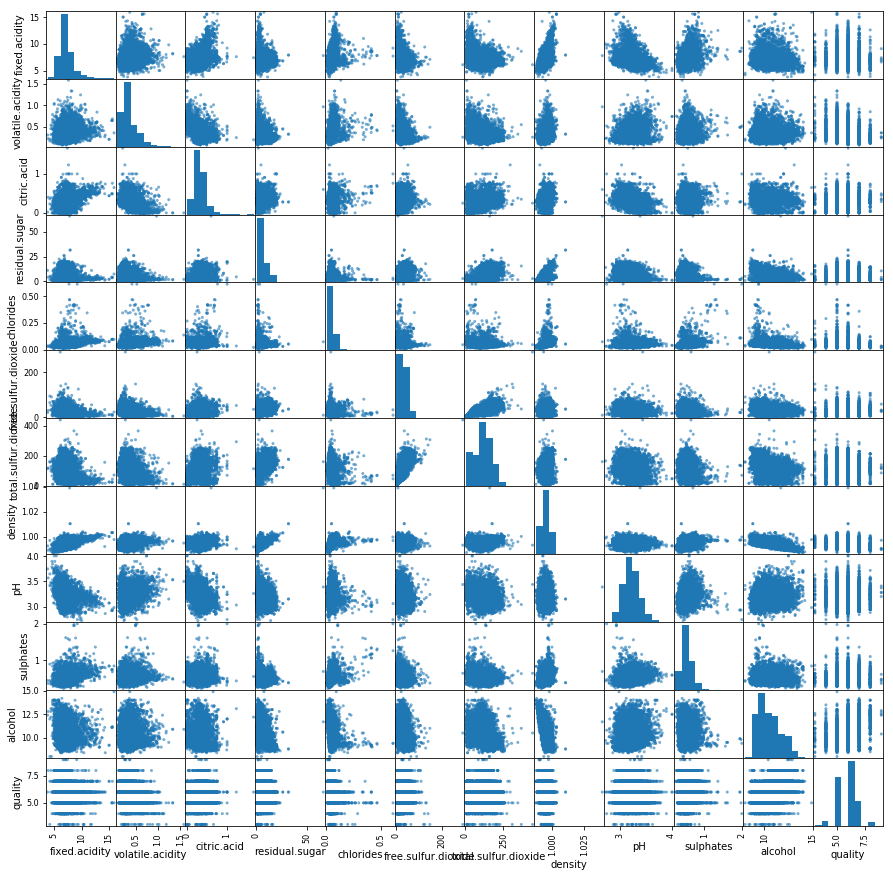

In [27]:
pd.plotting.scatter_matrix(df, alpha=0.6, figsize=(15, 15))
plt.show()

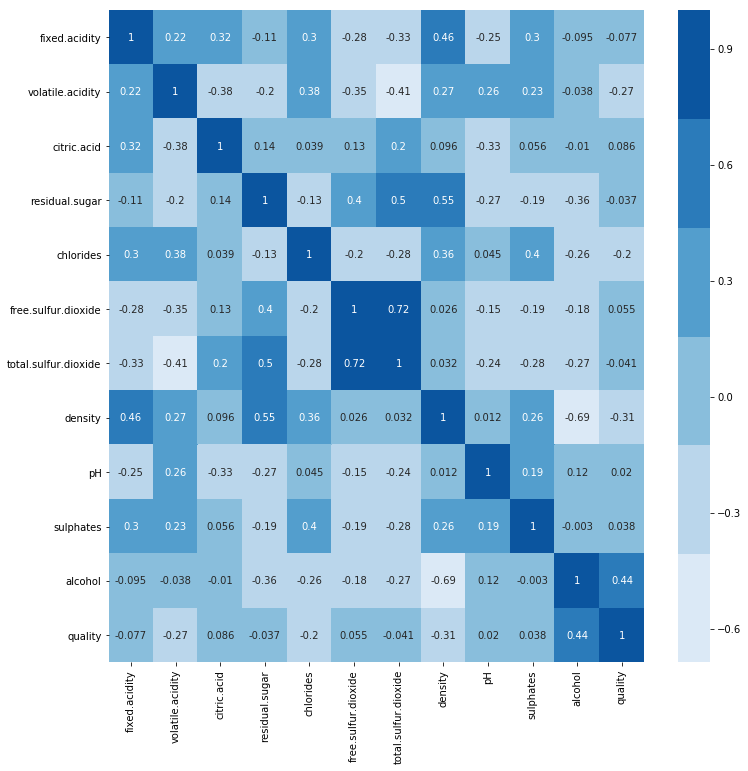

In [4]:
corr = df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, fmt='0.2g', cmap=sns.color_palette('Blues'))
plt.show()

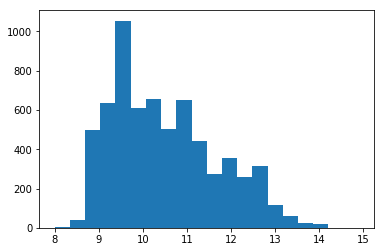

In [8]:
plt.hist(df["alcohol"], bins=20)
plt.show()

In [3]:
df["log_alcohol"] = np.log(df.alcohol)

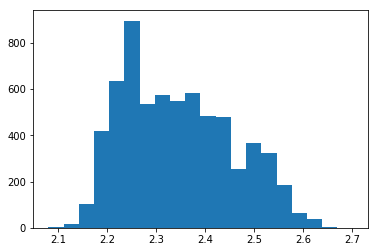

In [9]:
plt.hist(df["log_alcohol"], bins=20)
plt.show()

In [10]:
stats.skew(df["alcohol"]), stats.skew(df["log_alcohol"])

(0.5655871101943215, 0.3817716197063819)

(array([  30.,    0.,  216.,    0., 2138.,    0., 2836., 1079.,  193.,
           5.]),
 array([1.09861229, 1.20847352, 1.31833475, 1.42819598, 1.5380572 ,
        1.64791843, 1.75777966, 1.86764089, 1.97750212, 2.08736335,
        2.19722458]),
 <a list of 10 Patch objects>)

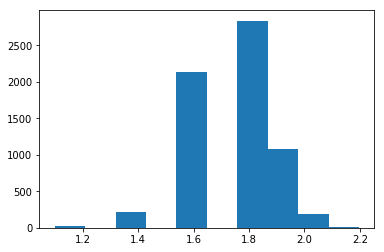

In [4]:
df["log_quality"] = np.log(df.quality)
plt.hist(df.log_quality)

In [13]:
df.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,log_alcohol,log_quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,2.344317,1.749540
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.111313,0.152891
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,2.079442,1.098612
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,2.251292,1.609438
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,2.332144,1.791759
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,2.424803,1.791759
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,2.701361,2.197225


In [22]:
### Let's check the skewness and kurtosis of each column
for column in df.columns:
    x = df[column]
    skew = stats.skew(x)
    kurt = stats.kurtosis(x, fisher=False)
    jb = stats.jarque_bera(x)
    print(column)
    print("-"*50)
    print("skew = {}\nkurt = {}\njb={}\n".format(skew, kurt, jb[0]))

fixed.acidity
--------------------------------------------------
skew = 1.7228917553916037
kurt = 8.056343144995266
jb=10135.328122096244

volatile.acidity
--------------------------------------------------
skew = 1.4947513386353368
kurt = 5.822275157734938
jb=4575.610604665658

citric.acid
--------------------------------------------------
skew = 0.4716217543120838
kurt = 5.394471370853947
jb=1792.9558292174193

residual.sugar
--------------------------------------------------
skew = 1.435072841441841
kurt = 7.354994475004971
jb=7364.271838733037

chlorides
--------------------------------------------------
skew = 5.398580962521251
kurt = 53.85796611348578
jb=731754.7880902437

free.sulfur.dioxide
--------------------------------------------------
skew = 1.219784372282318
kurt = 10.899231487557648
jb=18502.739639014686

total.sulfur.dioxide
--------------------------------------------------
skew = -0.001177206365785427
kurt = 2.627698949612829
jb=37.52386079647598

density
-----------

(array([  16.,  334., 1233., 2111., 1663.,  802.,  263.,   59.,   12.,
           4.]),
 array([2.72 , 2.849, 2.978, 3.107, 3.236, 3.365, 3.494, 3.623, 3.752,
        3.881, 4.01 ]),
 <a list of 10 Patch objects>)

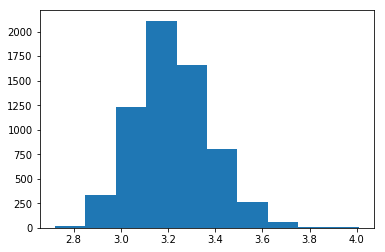

In [23]:
plt.hist(df["pH"])

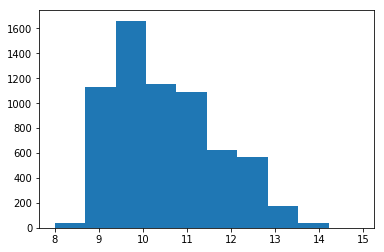

In [25]:
plt.hist(df["alcohol"])
plt.show()

In [105]:
### Let's test a basic model
def test_model(df=df, columns=None, target='quality', add_constant=False, test_size=0.25):
    x = df[columns]
    y = df[target]
    if add_constant:
         x = sm.add_constant(x)
    linreg = sm.OLS(y, x).fit()
    print(linreg.summary())
    
    reg = LinearRegression(fit_intercept=add_constant)
    cross_val = cross_val_score(reg, x, y, cv=5, scoring='r2')
    print(cross_val)
    return linreg, reg

In [83]:
test_model(columns=['density'])

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 2.847e+05
Date:                Fri, 10 May 2019   Prob (F-statistic):               0.00
Time:                        12:04:01   Log-Likelihood:                -8378.8
No. Observations:                6497   AIC:                         1.676e+04
Df Residuals:                    6496   BIC:                         1.677e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
density        5.8485      0.011    533.601      0.0

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1c23b1f6d8>,
 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
          normalize=False))

In [84]:
test_model(columns=['alcohol'])

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 3.214e+05
Date:                Fri, 10 May 2019   Prob (F-statistic):               0.00
Time:                        12:04:01   Log-Likelihood:                -7993.3
No. Observations:                6497   AIC:                         1.599e+04
Df Residuals:                    6496   BIC:                         1.600e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
alcohol        0.5516      0.001    566.942      0.0

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1c23c13d30>,
 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
          normalize=False))

#### alcohol and density are the best predictors right now

In [85]:
def make_scatter(df=df, x='alcohol', y='density'):
    plt.scatter(df[x], df[y], alpha=0.6)
    plt.ylabel(x)
    plt.xlabel(y)
    plt.title("{} vs {}".format(x, y))
    plt.show()
    corr = np.corrcoef(df[x], df[y])
    print("{} vs {} has \ncorr = \n{}".format(x, y, corr))

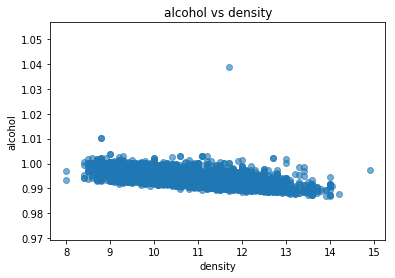

alcohol vs density has 
corr = 
[[ 1.         -0.68674542]
 [-0.68674542  1.        ]]


In [86]:
make_scatter(x='alcohol', y='density')

In [87]:
df["alc_dens"] = 0.6*df["alcohol"] + 0.4*df["density"]

In [88]:
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,log_alcohol,log_quality,alc_dens,alc_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2.240710,1.609438,6.03912,med
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2.282382,1.609438,6.27872,med
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2.282382,1.609438,6.27880,med
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2.282382,1.791759,6.27920,med
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2.240710,1.609438,6.03912,med


In [60]:
test_model(columns=["alc_dens"])

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 3.312e+05
Date:                Fri, 10 May 2019   Prob (F-statistic):               0.00
Time:                        11:42:51   Log-Likelihood:                -7897.4
No. Observations:                6497   AIC:                         1.580e+04
Df Residuals:                    6496   BIC:                         1.580e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
alc_dens       0.8656      0.002    575.541      0.0

10.491800831152855


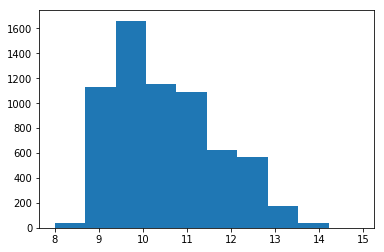

In [62]:
plt.hist(df["alcohol"])
print(df.alcohol.mean())

In [5]:
alcohol_type = []
for alcohol in df.alcohol:
    if alcohol < 9.0:
        alcohol_type.append("low")
    elif alcohol < 11.5:
        alcohol_type.append("med")
    else:
        alcohol_type.append('high')
df["alc_type"] = alcohol_type
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,log_alcohol,log_quality,alc_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2.240710,1.609438,med
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2.282382,1.609438,med
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2.282382,1.609438,med
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2.282382,1.791759,med
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2.240710,1.609438,med


In [68]:
df_dum = pd.get_dummies(df, columns=['alc_type'], drop_first=True)
df_dum.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,log_alcohol,log_quality,alc_dens,alc_type_low,alc_type_med
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2.240710,1.609438,6.03912,0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2.282382,1.609438,6.27872,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2.282382,1.609438,6.27880,0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2.282382,1.791759,6.27920,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2.240710,1.609438,6.03912,0,1


In [73]:
df_dum["log_ph"] = np.log(df["pH"])

In [106]:
test_model(df=df_dum, columns=["alcohol"], test_size=0.15)

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 3.214e+05
Date:                Fri, 10 May 2019   Prob (F-statistic):               0.00
Time:                        12:57:28   Log-Likelihood:                -7993.3
No. Observations:                6497   AIC:                         1.599e+04
Df Residuals:                    6496   BIC:                         1.600e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
alcohol        0.5516      0.001    566.942      0.0

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1c23c62240>,
 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
          normalize=False))

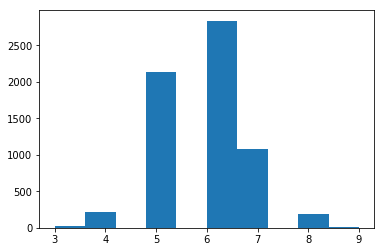

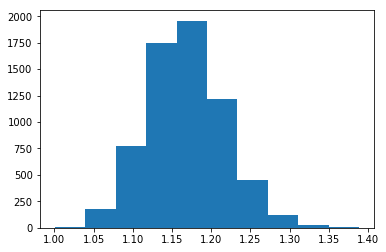

In [78]:
plt.hist(df["quality"])
plt.show()

plt.hist(df_dum["log_ph"])
plt.show()

In [6]:
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,log_alcohol,log_quality,alc_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2.240710,1.609438,med
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2.282382,1.609438,med
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2.282382,1.609438,med
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2.282382,1.791759,med
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2.240710,1.609438,med


In [22]:
df["alc_type"].dtype == 'O'

True

In [26]:
df["quality"].dtype == 'int64'

True

### Interpreting OLS Summary

### Questions
* Context of when to use OLS vs other Regression Techniques
    * polynomial regression
    * logistic regression
    * statsmodels vs sklearn
* When looking at OLS table, which metrics are most important to move forward with model
    * Which metrics are uh...not super informative or useful all the time
* For OLS are there common pitfalls coding with them?
* bins caused issues with OLS model in the past, how can this be avoided?
* When to and when not to add the constant -> look at the data, use your judgement, experiment

In [4]:
import numpy as np
import pandas as pd

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
boston = load_boston()
type(boston)

sklearn.utils.Bunch

In [7]:
data = boston.data
target = boston.target
features = list(boston.feature_names)
columns = features + ['target']

In [8]:
df = pd.DataFrame(np.column_stack((data, target)), columns=columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Make a Function that fits a workflow

In [30]:
def make_linreg(df, features, add_constant=False):
    x = df[features]
    if add_constant:
        x = sm.add_constant(x)
    y = df["target"]

    linreg = sm.OLS(y, x).fit()
    print(linreg.summary())
    return linreg

### Interpretation 
* Model
    * R-squared = 0.64 $\rightarrow$ age predicts 64% of the variance for the target
    * F-statistic = 915.1
* AGE
    * p-value = 0 $\rightarrow$ age predicting target is not random. 
        * confidence
    * coef = 0.2636 $\rightarrow$ has a positive correlation and is our slope for that feature
        * $y = mx \rightarrow y = 0.2636*\text{AGE}$

* Residuals
    * Kurtosis - 2.38 $\rightarrow$ residuals fall within 3 standard deviations of the mean
    * Skewness - 0.369 $\rightarrow$ residuals are pretty symmetric
    * Jarque-Bera - 19.564 \$rightarrow$ measure of normality where close to 0 means normal

### Write up
From the model above, the Prob(F-Test) indicates that the features used in the model have coefficients that are not equal to 0 with high confidence. We can also tell that AGE, given a coef of 0.2, has a positive correlation with our target. We know this isn't random, because our p-value is 0; therefore, AGE predicts our 64% of the variance of the target. Our residuals seem normally distributed, meaning that our linear regression model is not favoring 1 side of the data. 

### Investigate the residuals

In [32]:
def plot_residuals(linreg, df):
    y_hat = linreg.predict()
    residuals = df["target"] - y_hat
    plt.hist(residuals, bins=20, color='g', alpha=0.5)
    plt.show()
    x_vals = np.linspace(0, 1, len(residuals))
    plt.scatter(x_vals, residuals, c='g', alpha=0.5)
    plt.hlines(y=0, xmin=0, xmax=1, colors='r', linestyle='dashed')
    plt.ylim([-50, 50])
    plt.show()
    pass

In [13]:
residuals = df["target"] - y_hat

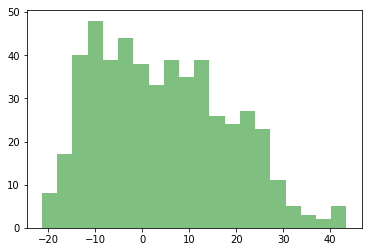

In [20]:
plt.hist(residuals, bins=20, color='g', alpha=0.5)
plt.show()

In [17]:
x_vals = np.linspace(0, 1, len(residuals))

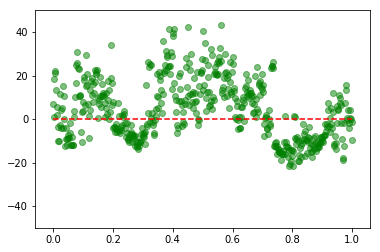

In [28]:
plt.scatter(x_vals, residuals, c='g', alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=1, colors='r', linestyle='dashed')
plt.ylim([-50, 50])
plt.show()

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     83.48
Date:                Wed, 15 May 2019   Prob (F-statistic):           1.57e-18
Time:                        11:59:36   Log-Likelihood:                -1801.5
No. Observations:                 506   AIC:                             3607.
Df Residuals:                     504   BIC:                             3615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.9787      0.999     31.006      0.0

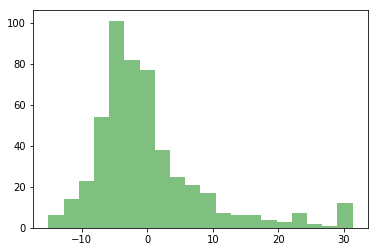

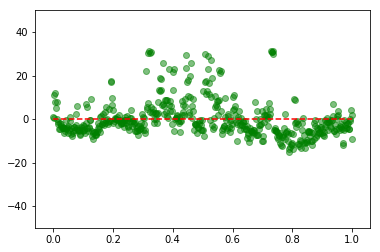

In [35]:
linreg = make_linreg(df, ["AGE"], add_constant=True)
plot_residuals(linreg, df)

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     915.1
Date:                Wed, 15 May 2019   Prob (F-statistic):          1.85e-115
Time:                        11:59:47   Log-Likelihood:                -2071.5
No. Observations:                 506   AIC:                             4145.
Df Residuals:                     505   BIC:                             4149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AGE            0.2636      0.009     30.250      0.0

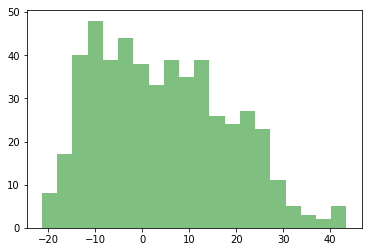

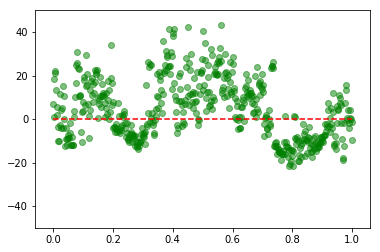

In [36]:
linreg = make_linreg(df, ["AGE"], add_constant=False)
plot_residuals(linreg, df)

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     484.7
Date:                Wed, 15 May 2019   Prob (F-statistic):          4.01e-118
Time:                        12:00:21   Log-Likelihood:                -2061.7
No. Observations:                 506   AIC:                             4127.
Df Residuals:                     504   BIC:                             4136.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AGE            0.1680      0.023      7.289      0.0

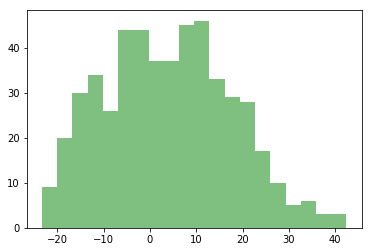

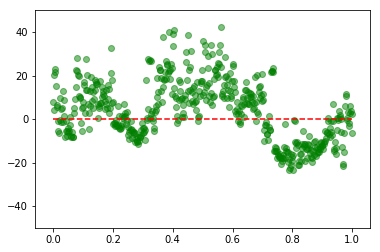

In [38]:
linreg = make_linreg(df, ["AGE", "TAX"], add_constant=False)
plot_residuals(linreg, df)

In [39]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     47.67
Date:                Wed, 15 May 2019   Prob (F-statistic):           1.06e-51
Time:                        12:04:20   Log-Likelihood:                -1710.5
No. Observations:                 506   AIC:                             3437.
Df Residuals:                     498   BIC:                             3471.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.6886      3.264     15.836      0.0

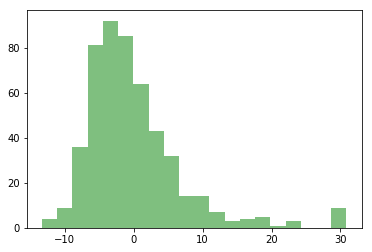

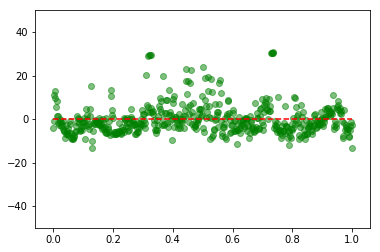

In [41]:
linreg = make_linreg(df, ["AGE", "TAX", "CRIM", "ZN", "INDUS", "NOX", "DIS"] , add_constant=True)
plot_residuals(linreg, df)